In [1]:
from saliency_methods.cam import GradCAM
from torchvision.models import resnet50
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, ToPILImage
from PIL import Image
import torch

In [2]:
model = resnet50(pretrained=True).eval()

preprocess = Compose((Resize([224, 224]), 
                    ToTensor()
                    ))
preprocess_normalize = Compose((preprocess,
                               Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
                              ))

inp = preprocess(Image.open("sample.jpeg"))
inp_normalized = preprocess_normalize(Image.open("sample.jpeg"))
inp_normalized = torch.unsqueeze(inp_normalized, 0)  # Add batch dimension

labels = torch.LongTensor([[254]])  # The label to explain for ('Pug')

# This can be replaced by all other methods introduced with no real modifications
explainer = GradCAM(model)

# Generate a pixel-level (not per channel) explanation with only positive contributions, 
#  normalised to lie between [0,1] 
explanation = explainer.explain(inp_normalized, labels, pixel_level=True, only_positive=True, normalize=True)

# You can also generate an explanation for the top-prediction by the network as follows:
#
# labels, explanation = explainer.explain_prediction(inp_normalized, 
#                                                     pixel_level=True, only_positive=True, normalize=True)

/home/benji/school/2020-2021/Extra Van Mezelf/saliency-methods/venv/lib/python3.9/site-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/home/benji/school/2020-2021/Extra Van Mezelf/saliency-methods/venv/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


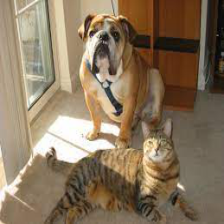

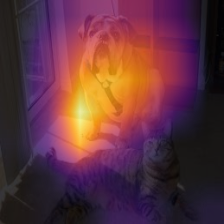

In [3]:
from saliency_methods.visualize import overlay

display(ToPILImage()(inp))
img_plus_explanation = overlay(inp, explanation.squeeze())  # Remove batch dimension
display(img_plus_explanation)